importing our data
used APIFY TIKTOK SCRAPER to scrape data from tiktok 

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import accuracy_score  
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score


In [2]:
#df=pd.read_excel(r"C:\Users\maria\OneDrive\Documents\dataset_tiktok-scraper_2022-11-30_22-22-51-170.xlsx")
df=pd.read_excel(r"C:\Users\maria\Downloads\dataset_tiktok-scraper2_2022-11-30_22-22-51-170 (1).xlsx")
df=df[['videoMeta_duration','shareCount','playCount','musicMeta_musicName','likes','createTimeISO','commentCount','authorMeta_video','creator_likes','authorMeta_fans','hashtag_1']]
df.head()

,videoMeta_duration,shareCount,playCount,musicMeta_musicName,likes,createTimeISO,commentCount,authorMeta_video,creator_likes,authorMeta_fans,hashtag_1
0,23,184300,23300000,original sound,4700000,2022-11-24T01:37:44.000Z,32100,2013,58400000,1500000,worldcup
1,77,13100,31200000,roll roll roll the coin,4400000,2022-11-22T16:16:56.000Z,14600,585,65700000,4900000,threelions
2,74,55200,23000000,World Cup,3900000,2022-11-11T10:44:17.000Z,33300,94,7300000,177800,worldcup
3,89,57700,29600000,original sound,3300000,2022-11-20T11:33:54.000Z,11900,918,122400000,4500000,worldcup
4,23,30900,17700000,som original,3300000,2022-11-26T01:19:42.000Z,9209,49,3700000,53200,copa2014


Cleanining our data

In [3]:
df.createTimeISO=pd.to_datetime(df.createTimeISO)
df['createTimeISO']=df['createTimeISO'].dt.tz_convert('Canada/Eastern')
df['dayofyear']=df['createTimeISO'].dt.dayofyear
df['time']=df['createTimeISO'].dt.hour
#df['hashtag_2']=df1['hashtag_2']
#df['videoMeta/height']=df1['videoMeta/height']


In [4]:
df=df.drop(['createTimeISO'],axis=1)
df

,videoMeta_duration,shareCount,playCount,musicMeta_musicName,likes,commentCount,authorMeta_video,creator_likes,authorMeta_fans,hashtag_1,dayofyear,time
0,23,184300,23300000,original sound,4700000,32100,2013,58400000,1500000,worldcup,327,20
1,77,13100,31200000,roll roll roll the coin,4400000,14600,585,65700000,4900000,threelions,326,11
2,74,55200,23000000,World Cup,3900000,33300,94,7300000,177800,worldcup,315,5
3,89,57700,29600000,original sound,3300000,11900,918,122400000,4500000,worldcup,324,6
4,23,30900,17700000,som original,3300000,9209,49,3700000,53200,copa2014,329,20
...,...,...,...,...,...,...,...,...,...,...,...,...
907,10,1378,8600000,KSKCCCTGDA l BT Remix,277300,607,42,387000,5484,bongda,323,5
908,31,9527,2200000,original sound,274900,1365,290,617300,12400,águilas,326,13
909,24,2561,1600000,original sound,265300,1177,433,7100000,110000,mexico,311,18
910,35,1368,1800000,original sound - Rom,229100,4878,203,20600000,544400,moneytok,329,13


visualizing 

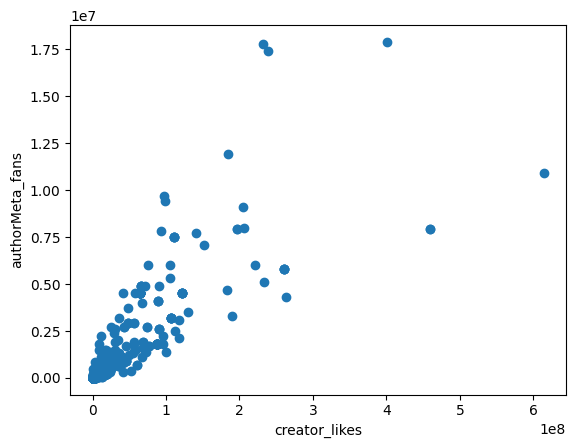

In [5]:
plt.scatter(df['creator_likes'],df.authorMeta_fans)
plt.xlabel("creator_likes")
plt.ylabel('authorMeta_fans')
plt.show()

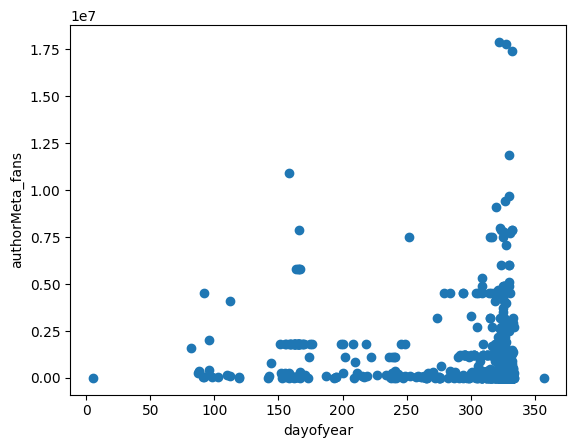

In [6]:
plt.scatter(df['dayofyear'],df.authorMeta_fans)
plt.xlabel("dayofyear")
plt.ylabel('authorMeta_fans')
plt.show()

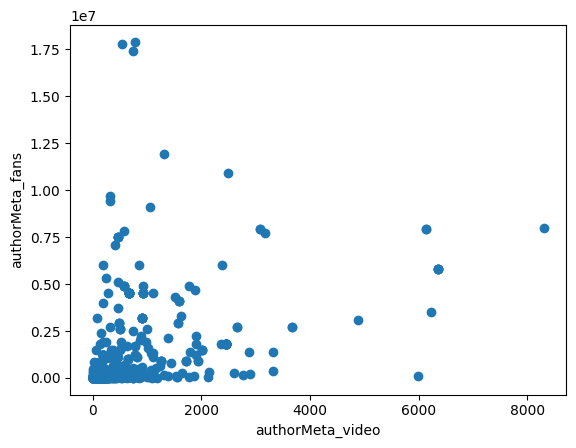

In [7]:
plt.scatter(df['authorMeta_video'],df.authorMeta_fans)
plt.xlabel("authorMeta_video")
plt.ylabel('authorMeta_fans')
plt.show()


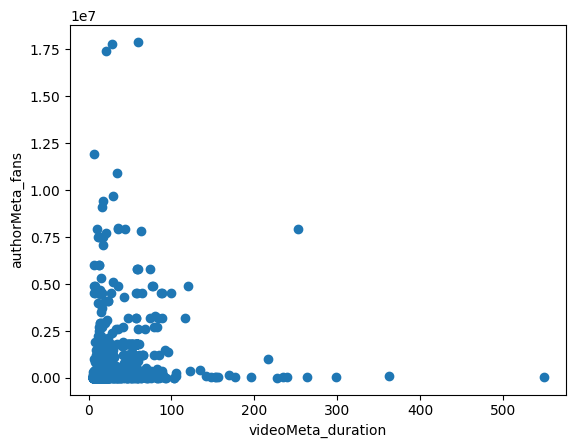

In [8]:
plt.scatter(df['videoMeta_duration'],df.authorMeta_fans)
plt.xlabel("videoMeta_duration")
plt.ylabel('authorMeta_fans')
plt.show()

C:\Users\maria\AppData\Local\Temp\ipykernel_23016\706016905.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap='Blues', annot=True)


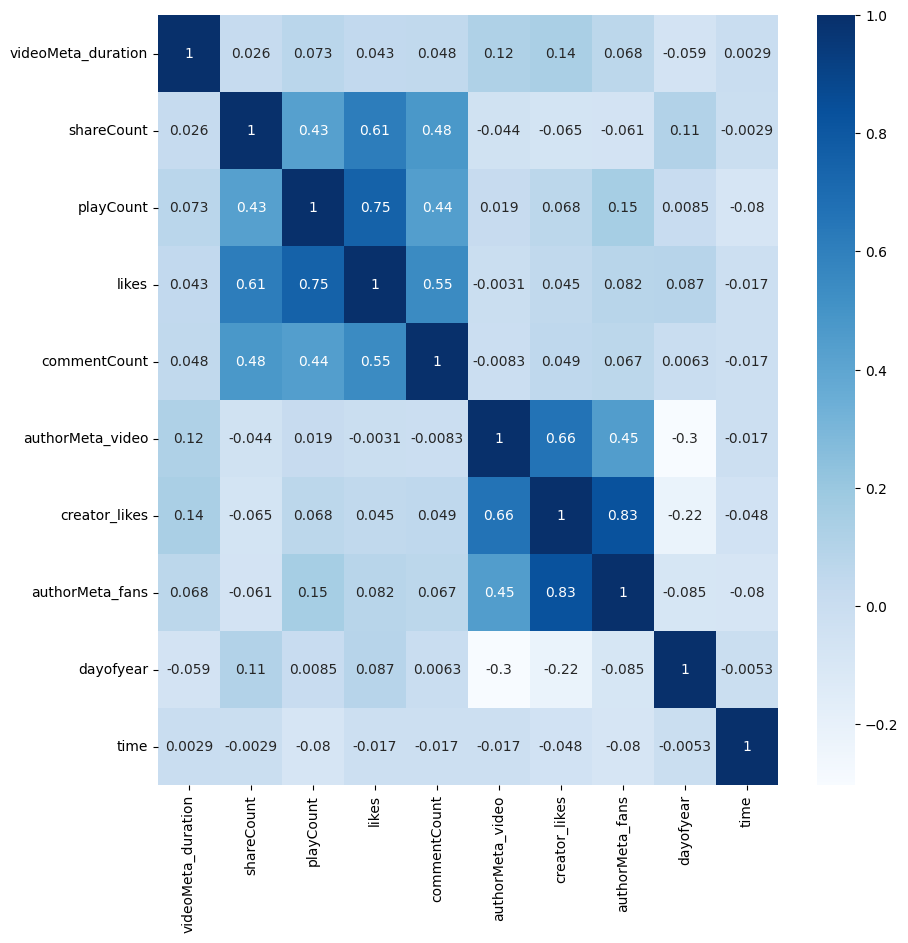

In [9]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), cmap='Blues', annot=True)
plt.show()

Trials and Errors

we are gonna one hot encode our data for the column hashtag 1

In [11]:
dummies=pd.get_dummies(df['hashtag_1'],drop_first=True)
dummy=pd.concat([df,dummies],axis=1)
new_df=dummy.drop(['hashtag_1','musicMeta_musicName'],axis=1)
new_df.head()

,videoMeta_duration,shareCount,playCount,likes,commentCount,authorMeta_video,creator_likes,authorMeta_fans,dayofyear,time,...,قطر,كأس_العالم_2022,كاس_العالم,كورال_روح_الشرق,كوريا_الجنوبية,محمد_عدنان,نيمار,همكس,대한민국화이팅,조규성
0,23,184300,23300000,4700000,32100,2013,58400000,1500000,327,20,...,0,0,0,0,0,0,0,0,0,0
1,77,13100,31200000,4400000,14600,585,65700000,4900000,326,11,...,0,0,0,0,0,0,0,0,0,0
2,74,55200,23000000,3900000,33300,94,7300000,177800,315,5,...,0,0,0,0,0,0,0,0,0,0
3,89,57700,29600000,3300000,11900,918,122400000,4500000,324,6,...,0,0,0,0,0,0,0,0,0,0
4,23,30900,17700000,3300000,9209,49,3700000,53200,329,20,...,0,0,0,0,0,0,0,0,0,0


Making oour model:

In [12]:
X=new_df.drop([	'time','authorMeta_fans','videoMeta_duration','shareCount','likes','commentCount','dayofyear'],axis=1)
y=new_df['authorMeta_fans']

In [13]:
X

,playCount,authorMeta_video,creator_likes,1,2022tiktok,22,ad,afaseleccion,aftereffects,albiceleste,...,قطر,كأس_العالم_2022,كاس_العالم,كورال_روح_الشرق,كوريا_الجنوبية,محمد_عدنان,نيمار,همكس,대한민국화이팅,조규성
0,23300000,2013,58400000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,31200000,585,65700000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,23000000,94,7300000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,29600000,918,122400000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,17700000,49,3700000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
907,8600000,42,387000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
908,2200000,290,617300,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
909,1600000,433,7100000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
910,1800000,203,20600000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [16]:
y_pred=model.predict(X_test)
prediction=model.predict(X_train)


In [17]:
train_score=r2_score(y_train,prediction)
train_score

0.9201142727706187

In [18]:
test_score=r2_score(y_test,y_pred)
test_score

0.7470155079216723

In [19]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
cv=ShuffleSplit(n_splits=5,test_size=0.3,random_state=0)
cross_val_score(model,X,y,cv=cv)

array([0.74701551, 0.72274653, 0.72725916, 0.77369517, 0.86777614])

In [20]:
from sklearn.linear_model import Lasso
model_lasso=Lasso(alpha=2, selection='cyclic')
model_lasso.fit(X_train,y_train)

c:\Users\maria\model-deployment-2\.venv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.438e+13, tolerance: 2.113e+11
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=2)

In [21]:
model_lasso.score(X_train,y_train)

0.9201141405949383

In [22]:
model_lasso.score(X_test,y_test)

0.7518668228662502

In [23]:
def predict_subscribers(Hashtag_1,playCount, authorMeta_video, creator_likes):    
    loc_index = np.where(X.columns==Hashtag_1)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = playCount
    x[1] = authorMeta_video
    x[2] = creator_likes
    if loc_index >= 0:
        x[loc_index] = 1

    return model_lasso.predict([x])[0]

In [26]:
predict_subscribers('mexico',23000000,2013,58400000)

c:\Users\maria\model-deployment-2\.venv\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


2232031.005042311

Final model

In [32]:
x=df[['hashtag_1','playCount','authorMeta_video','creator_likes']]
y=df.authorMeta_fans

In [45]:
from sklearn.pipeline import Pipeline 
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import Lasso
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=0) 

In [52]:
categorical_features = ['hashtag_1']
    
categorical_transformer = Pipeline(steps = [('imputer',SimpleImputer(strategy = 'constant')),
                                            ('encoder',OneHotEncoder(handle_unknown='ignore'))])
    
numerical_features = ['playCount','authorMeta_video','creator_likes']
    
numerical_transformer = Pipeline(steps = [('scaler',StandardScaler())]) 
    
preprocessor = ColumnTransformer(transformers = [('cat',categorical_transformer,categorical_features),
                                                  ('num',numerical_transformer,numerical_features)])
    
regressor =Lasso(alpha=2, selection='cyclic')
    
regressor_pipeline = Pipeline(steps = [('preprocessor',preprocessor),
                                          ('regressor',regressor)])

In [53]:
regressor_pipeline.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='constant')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['hashtag_1']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['playCount',
                                                   'authorMeta_video',
                                                   'creator_likes'])])),
                ('regressor', Lasso(alpha=2))])

In [54]:
regressor_pipeline.score(X_train,y_train)

0.9201141404872558

In [55]:
regressor_pipeline.score(X_test,y_test)

0.7518526667655431

In [56]:
import pickle
with open('model.pkl','wb') as file:
    pickle.dump(regressor_pipeline,file)
    